In [1]:
import os
import numpy as np
import random
import math
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [9]:
plt.style.use("bmh")

# -- set grayscale to be the default color map 
# plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams['axes.titlepad'] = 0 

In [36]:
def bin_imgs(imgs, fac, noise=None):
    """
    Bin sequence of images (nrow,ncol,ntsteps) and add noise if desired.
    If adding noise, set noise kw to be a tuple of (seed, mean, sigma[unbinned])
    """
    
    # -- bin our image by 80 and get the time series image for a given night
    sh = imgs.shape
    img_bin = imgs.reshape(sh[0]//fac, fac, sh[1]//fac, fac, sh[2]).mean(axis=(1, 3))

    # -- add gaussian noise
    seed_noise, avg, sigma = noise
    new_amp = sigma / math.sqrt(fac * fac)
    np.random.seed(seed_noise)

    # -- add noise to binned image
    img_bin_noise = img_bin.copy()
    for i in range(3240):
        img_bin_noise[:, :, i] = img_bin[:, :, i] + \
            np.random.normal(mean, new_amp, (img_bin.shape[0], img_bin.shape[1]))
        
    return img_bin_noise

In [40]:
# -- set the seeds for the locations and time series (up to 6 digits)
seed_loc = 314
seed_ts0 = 128
seed_ts1 = 964

# -- load locations
loc_fname = "../../lighting-tech-changeover/output/img_simu_loc_{0:06}.npy".format(seed_loc)
loc = np.load(loc_fname)

# -- get the corresponding time series
ts_fname0 = "../../lighting-tech-changeover/output/img_simu_src_curve_{0:06}.npy".format(seed_ts0)
srcs0 = np.load(ts_fname0)
ts_fname1 = "../../lighting-tech-changeover/output/img_simu_src_curve_{0:06}.npy".format(seed_ts1)
srcs1 = np.load(ts_fname1)

In [42]:
# -- duplicate each light curve by five times
src0 = np.repeat(srcs0, repeats=9, axis=0)

# -- get full list of source location
loc_new = []
for i in range(len(loc)):
    loc0 = (loc[i][0] + 1, loc[i][1])
    loc1 = (loc[i][0] - 1, loc[i][1])
    loc2 = (loc[i][0], loc[i][1])
    loc3 = (loc[i][0], loc[i][1] + 1)
    loc4 = (loc[i][0], loc[i][1] - 1)
    loc5 = (loc[i][0] - 1, loc[i][1] - 1)
    loc6 = (loc[i][0] - 1, loc[i][1] + 1)
    loc7 = (loc[i][0] + 1, loc[i][1] - 1)
    loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
    loc_new.append(loc0)
    loc_new.append(loc1)
    loc_new.append(loc2)
    loc_new.append(loc3)
    loc_new.append(loc4)
    loc_new.append(loc5)
    loc_new.append(loc6)
    loc_new.append(loc7)
    loc_new.append(loc8)

# -- add sources curve to time series images (try/except to handle boundaries)
t0 = time.time()
imgs = np.zeros((2560, 1920, 3240))
print(time.time() - t0)
for i in range(len(loc_new)):
    try:
        imgs[loc_new[i][0], loc_new[i][1], :] = src0[i]
    except:
        continue
        
# -- bin images and add noise
imgs_bin_noise0 = bin_imgs(imgs, 80, noise=(333, 0., 0.01))

0.4729611873626709


In [47]:
# -- duplicate each light curve by five times
src1 = np.repeat(srcs1, repeats=9, axis=0)

# -- get full list of source location
loc_new = []
for i in range(len(loc)):
    loc0 = (loc[i][0] + 1, loc[i][1])
    loc1 = (loc[i][0] - 1, loc[i][1])
    loc2 = (loc[i][0], loc[i][1])
    loc3 = (loc[i][0], loc[i][1] + 1)
    loc4 = (loc[i][0], loc[i][1] - 1)
    loc5 = (loc[i][0] - 1, loc[i][1] - 1)
    loc6 = (loc[i][0] - 1, loc[i][1] + 1)
    loc7 = (loc[i][0] + 1, loc[i][1] - 1)
    loc8 = (loc[i][0] + 1, loc[i][1] + 1)
    
    
    loc_new.append(loc0)
    loc_new.append(loc1)
    loc_new.append(loc2)
    loc_new.append(loc3)
    loc_new.append(loc4)
    loc_new.append(loc5)
    loc_new.append(loc6)
    loc_new.append(loc7)
    loc_new.append(loc8)

# -- add sources curve to time series images (try/except to handle boundaries)
t0 = time.time()
imgs = np.zeros((2560, 1920, 3240))
print(time.time() - t0)
for i in range(len(loc_new)):
    try:
        imgs[loc_new[i][0], loc_new[i][1], :] = src1[i]
    except:
        continue
        
# -- bin images and add noise
imgs_bin_noise1 = bin_imgs(imgs, 80, noise=(8457, 0., 0.01))

0.4723806381225586


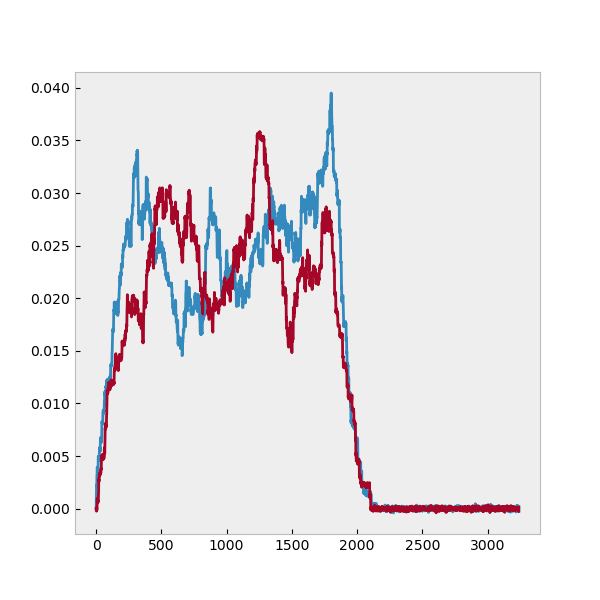

In [48]:
plt.close("all")
plt.plot(imgs_bin_noise0[20, 15, :])
plt.plot(imgs_bin_noise1[20, 15, :])

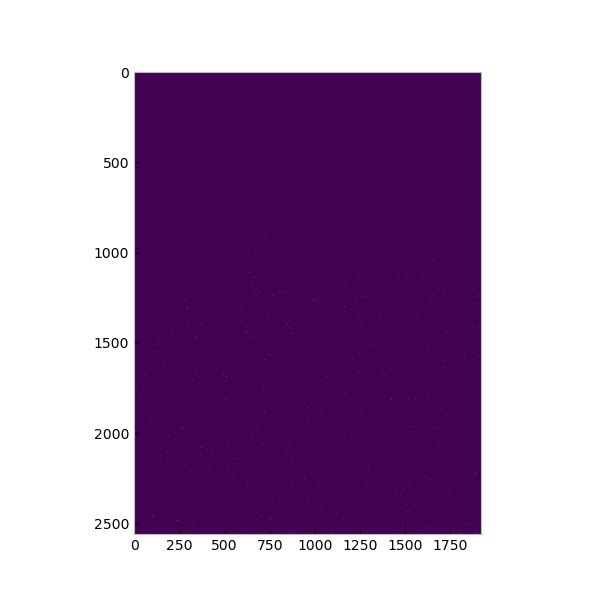

In [20]:
plt.close("all")
plt.imshow(imgs[:, :, 10])

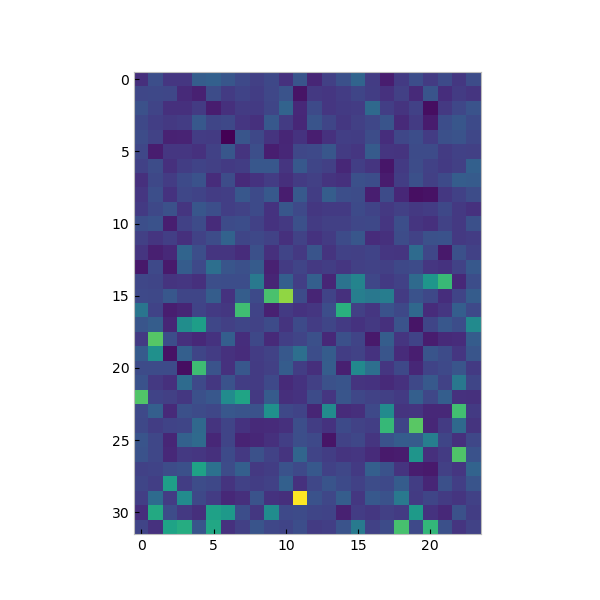

In [29]:
plt.close("all")
plt.imshow(img_bin_noise[:, :, 8] - img_bin_noise[:, :, 7])

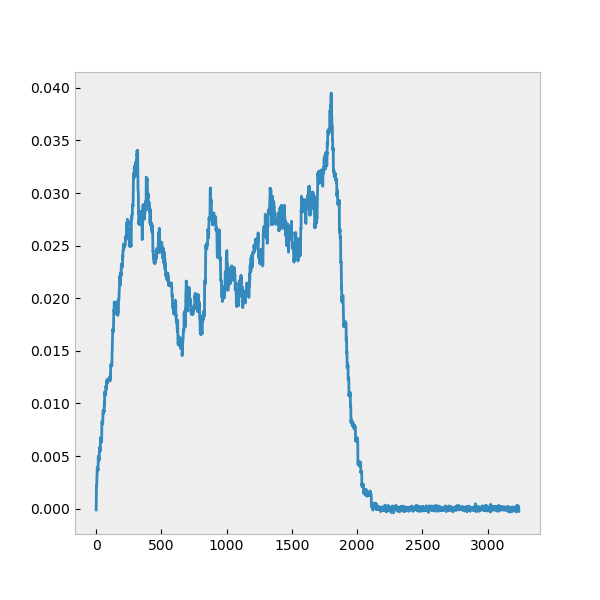

In [31]:
plt.close("all")
plt.plot(img_bin_noise[20, 15])